In [ ]:
#write a function that take a aspx and return a csv file
#here is the schema of the aspx file
"""<table cellspacing="0" rules="all" border="1" id="GridHistValeur" style="border-collapse:collapse;">
	<tr>
		<td>
                            Séance
                        </td><td>
                            COURS_CLOTURE
                        </td><td>
                            COURS_AJUSTE
                        </td><td>
                          EVOLUTION
                        </td><td>
                            QUANTITE_ECHANGE
                        </td><td>
                            VOLUME
                        </td>
	</tr><tr>
		<td>
                            <span id="GridHistValeur_ctl02_Label1">01/12/2022</span>
                        </td><td>
                            <span id="GridHistValeur_ctl02_Label1">410,00</span>
                        </td><td>
                            <span id="GridHistValeur_ctl02_Label1">410,00</span>
                        </td><td>
                            <span id="GridHistValeur_ctl02_Label1">1,74</span>
                        </td><td>
                            <span id="GridHistValeur_ctl02_Label1">16537</span>
                        </td><td>
                            <span id="GridHistValeur_ctl02_Label1">6781578,3</span>
                        </td>
	</tr><tr>"""


In [23]:
import pandas as pd

In [24]:
from bs4 import BeautifulSoup
import csv

def aspx_to_csv(aspx_string):
    soup = BeautifulSoup(aspx_string, 'html.parser')

    # Find the table with the specified id
    table = soup.find('table', {'id': 'GridHistValeur'})
    print(table)

    # Create a list to store the data
    data = []

    # Add the headers to the data list
    headers = [header.text for header in table.find_all('td')]
    data.append(headers)

    # Find all rows in the table
    rows = table.find_all('tr')
    print(rows)
    
    # Iterate through each row
    for row in rows:
        # Find all cells in the row
        cells = row.find_all('td')
        # Extract the text from each cell
        values = [cell.text for cell in cells]
        # Add the values to the data list
        data.append(values)
    #print(data)
    
    # Write the data to a pandas dataframe
    df = pd.DataFrame(data)
    print(df)
    """
    # Write the data to a CSV file
    with open('output.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(data)"""

In [4]:
with open('Telechargement-Histo-Valeur.aspx', 'r') as file:
    aspx_contents = file.read()

In [28]:
from bs4 import BeautifulSoup
import csv

soup = BeautifulSoup(aspx_contents, 'html.parser')
# Find the table with the specified id
table = soup.find('table', {'id': 'GridHistValeur'})
# Create a list to store the data

headers=table.find('tr')
#print(headers)
colnames=[col.text.strip() for col in headers.find_all('td')]
##for header in colnames:
 #   colnames.append(header.find('td').text())
print(colnames)

['SÃ©ance', 'COURS_CLOTURE', 'COURS_AJUSTE', 'EVOLUTION', 'QUANTITE_ECHANGE', 'VOLUME']


In [40]:
from bs4 import BeautifulSoup
import csv

soup = BeautifulSoup(aspx_contents, 'html.parser')
# Find the table with the specified id
table = soup.find('table', {'id': 'GridHistValeur'})
# Create a list to store the data
data = ""
# Add the headers to the data list
dict={}
datalist=[]
headers=table.find('tr')
#print(headers)
colnames=[col.text.strip() for col in headers.find_all('td')]
colnames[0]="SEANCE"
#headers = [header.text.strip() for header in table.find('tr')]
print(headers)
for header in colnames:
    dict[header]=[]


# Find all rows in the table
rows = table.find_all('tr')

# Iterate through each row
for row in rows:
    # Find all cells in the row
    cells = row.find_all('span')
    cell=[cell.text.strip() for cell in cells]
    L=[]
    for i in cell:
        L.append(i.replace(",","."))

    s=",".join(L)
    for i in range(len(L)):
        dict[colnames[i]].append(L[i])
    #datalist.append(s+"\n")
    #with open('datanew.csv', 'a') as file:
    #    file.write(s)

#print(dict)
import pandas as pd
pd.DataFrame(dict).to_csv('datanew.csv',index=False)

<tr>
<td>
                            SÃ©ance
                        </td><td>
                            COURS_CLOTURE
                        </td><td>
                            COURS_AJUSTE
                        </td><td>
                          EVOLUTION
                        </td><td>
                            QUANTITE_ECHANGE
                        </td><td>
                            VOLUME
                        </td>
</tr>


In [2]:
import pandas as pd
df=pd.read_csv('datanew.csv')

In [8]:
df

,SEANCE,COURS_CLOTURE,COURS_AJUSTE,EVOLUTION,QUANTITE_ECHANGE,VOLUME
0,01/12/2022,410.00,410.00,1.74,16537,6781578.30
1,30/11/2022,403.00,403.00,-1.47,62881,25385455.15
2,29/11/2022,409.00,409.00,-0.24,19363,7927594.65
3,28/11/2022,410.00,410.00,0.01,26033,10676550.00
4,25/11/2022,409.95,409.95,1.72,6136,2509855.00
...,...,...,...,...,...,...
727,08/01/2020,497.00,497.00,0.40,112770,56048759.40
728,07/01/2020,495.00,495.00,0.92,17848,8783103.50
729,06/01/2020,490.50,490.50,-0.90,21396,10493239.90
730,03/01/2020,494.95,494.95,1.01,26656,13112391.10


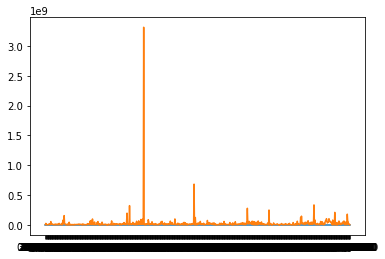

In [7]:
#plot the data
import matplotlib.pyplot as plt
plt.plot(df['SEANCE'],df['COURS_CLOTURE'])
plt.plot(df['SEANCE'], df['VOLUME'])
plt.show()

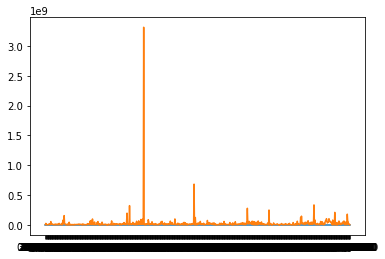

511.0
318.1
3312760487.35


In [9]:
import pandas as pd

class Stock:
    def __init__(self, name, csv_file):
        self.name = name
        self.data = pd.read_csv(csv_file)

    def plot(self):
        plt.plot(self.data['SEANCE'], self.data['COURS_CLOTURE'])
        plt.plot(self.data['SEANCE'], self.data['VOLUME'])
        plt.show()
    def max_value(self):
        return self.data['COURS_CLOTURE'].max()
    def min_value(self):
        return self.data['COURS_CLOTURE'].min()
    def max_volume(self):
        return self.data['VOLUME'].max()
    def max_quantite(self):
        return self.data['QUANTITE_ECHANGE'].max()

#objet stock
attijary = Stock('attijary', 'datanew.csv')
attijary.plot()
print(attijary.max_value())
print(attijary.min_value())
print(attijary.max_volume())

        


task6=Momentum

In [ ]:
#convert seance column to datetime
df['SEANCE']=pd.to_datetime(df['SEANCE'],format='%d/%m/%Y')
